In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

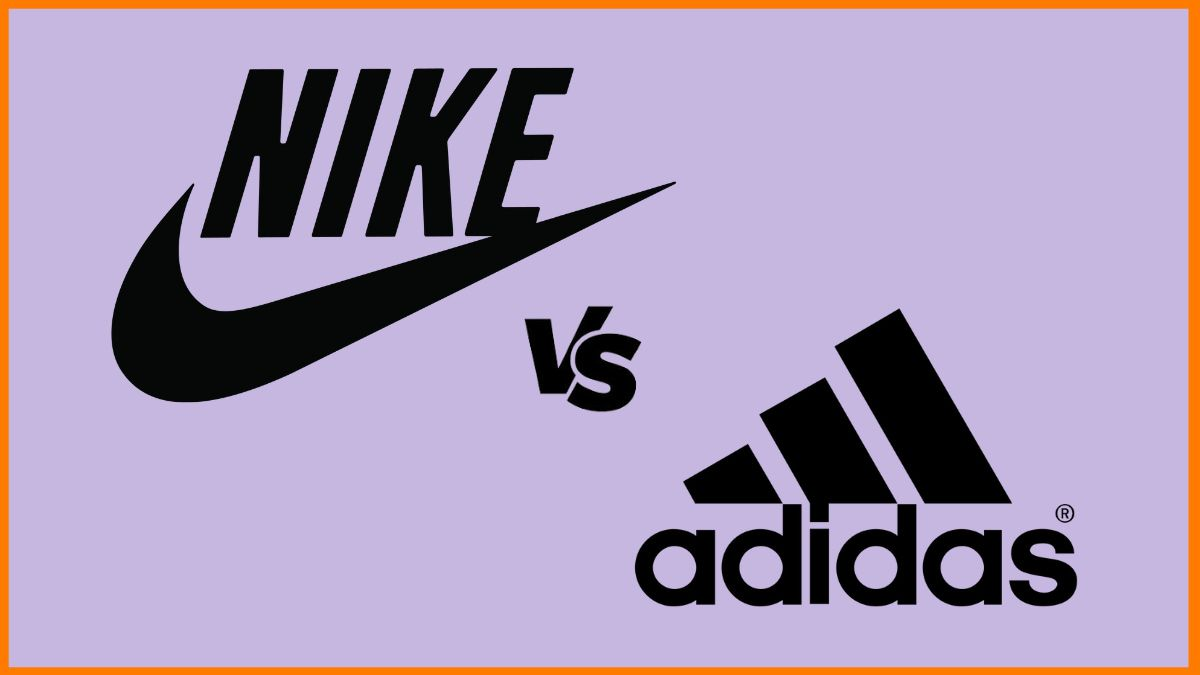

                                    Table of Contents
                                    
                                    
                                  
*                                     [Introduction](#Introduction).
*                             [Data Cleaning and Pre Processing.](#Cleaning).
*                                 [EDA of Nike and adidas](#A)
*                                  [Conclusion](#B)
                               


<a id="Introduction"></a>
**Introduction**

**Nike** and **Adidas** are the oldest rivals, in the footwear Industry. Both these Brands represent excellence in performance with their Products.
The Mojo of Nike is  "**Just do it**" while Adidas Mojo is "**Nothing is impossible**".
Both these Brands have delivered Iconic Products over the years.
Some of Nike's Legendary products are **Jordans**, **Air Max**, A**irforce 1**, the list goes on. While Adidas too have iconic products like **Superstars**,
**Ultraboost**, NMD   and the recent Hit  **The Yeezy's**.
With the help  of the Data set provided. I could dive deep into the Analysis as to how these products differ in terms of the discounts, Selling price, Listing Price etc.


<a id ="Cleaning"></a>
**Data Cleaning and Pre Processing**

Cleaning the data wasn't a big deal as the data had very few anomalies. There were no null values present, Every column standard values.

In [ ]:
NikeAdidas= pd.read_csv('../input/adidas-vs-nike/Adidas Vs Nike.csv')

**The data set**

In [ ]:
NikeAdidas

In [ ]:
NikeAdidas.info()

In [ ]:
NikeAdidas.describe()

In [ ]:
NikeAdidas.isnull().count()

**Dropping the Product ID column**



The product ID column provided no need for the Analysis.

In [ ]:
NikeAdidas=NikeAdidas.drop(columns=['Product ID'], axis=1)

**Converting String to Date and time format**

Rectifying,  the date and time column, as the data provided in the dataset was in string format.

In [ ]:
NikeAdidas['Last Visited']=pd.to_datetime(NikeAdidas['Last Visited'])

In [ ]:
NikeAdidas

In [ ]:
NikeAdidas.isnull().count()

In [ ]:
NikeAdidas

**Listing Price**


There were some places where the Listing price was set to Zero and technically that is not correct so Replacing them with the sale Price and if you notice closely the places where the sale value is zero the discount is also zero.


In [ ]:
boolean_condition=NikeAdidas['Listing Price']==0
Column_Name='Listing Price'
new_value= NikeAdidas['Sale Price']
NikeAdidas.loc[boolean_condition,Column_Name]=new_value
NikeAdidas

In [ ]:
NikeAdidas.Brand.unique()

**Correcting the Sub Brands.**




The Subbrand Adidas originals were repeated twice, so replacing Adidas Adidas Originals with Adidas Originals.

In [ ]:
NikeAdidas['Brand']= NikeAdidas['Brand'].replace('Adidas Adidas ORIGINALS','Adidas ORIGINALS')
NikeAdidas.Brand.unique()


**Grouping By Data frame by Nike and Adidas**

In [ ]:
GroupedByBrands=NikeAdidas.groupby('Brand')
Nike= GroupedByBrands.get_group('Nike')
Orginals=GroupedByBrands.get_group('Adidas ORIGINALS')
Neo=GroupedByBrands.get_group('Adidas CORE / NEO')
Sports=GroupedByBrands.get_group('Adidas SPORT PERFORMANCE')
Frames=[Orginals,Neo,Sports]
Adidas=pd.concat(Frames)
Adidas.reset_index(inplace=True,drop=True)



<a id= "A"></a>
# EDA of Nike and adidas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


**Discounts offered**



From the pie chart, it is clear that Nike usually offers any discount.
Meanwhile, every sub-brand of Adidas has offered discounts.

In [ ]:
GroupedByBrands=NikeAdidas.groupby(NikeAdidas['Brand'])
AvgDis=GroupedByBrands.mean()
plt.subplots(figsize=(10,6));
discount=np.array(AvgDis.Discount)
label=AvgDis.index
plt.pie(x=discount,autopct="%.1f%%", explode=[0.10]*4,labels=label);
plt.title('Discounts offered by Brands');



**Products offered by Adidas and Nike**


Products offered by Adidas is way more than that of Adidas. The difference is clearly Visible

In [ ]:
n=Nike['Product Name'].value_counts().count()
a=Adidas['Product Name'].value_counts().count()
Products=[n,a]
Brands=['Nike','Adidas'];
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(Brands,Products).set(xlabel='Brands', ylabel='Number of Products offered');
plt.title('Products offered By Brands');






**Adidas**

In [ ]:
Adidas

**Common Products offered by Adidas**

In [ ]:
AdidasProducts=Adidas['Product Name'].value_counts().head()
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.set_theme(style='whitegrid')
sns.barplot(AdidasProducts.index,AdidasProducts).tick_params(axis='x', rotation=45);
plt.title('Common Adidas Products Manufactured');

**Common Products offered by Nike**

In [ ]:
NikeProducts=Nike['Product Name'].value_counts().head(6)
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.set_theme(style='whitegrid')
sns.barplot(NikeProducts.index, NikeProducts).tick_params(axis='x', rotation=45);
plt.title('Common Products from Nike');


**Average Listing Price for Nike**


The average Listing Price of Nike is between RS(7500 to 10000)

In [ ]:

sns.set_style('whitegrid')
sns.distplot(Nike['Listing Price'],bins=10,color='r');


**Average Listing Price for Adidas**

The Average Listing Price of Adidas Lies between RS(5000 to 7500), Making Adidas way more cheaper than Nike

In [ ]:
sns.set_theme(style='whitegrid')
sns.distplot(Adidas['Listing Price'],bins=10,color='black');

**Rating and Reviews by Nike**

The average rating received by Nike is low, this implies poor customer satisfaction. However the standard deviation revies for the same band is quite significant, suggesting the popularity of its products.

In [ ]:
Nike[['Rating','Reviews']].describe()


**Rating and Reviews by Adidas**

The average rating received by Adidas is fairly higher than Nike. Apart from customer satisfaction, this could be due to the fact that Adidas products are fairly cheap and offer huge discounts on their products.
The Standard Deviation for reviews is again good when compared to Nike, the possible reason for this can be that Adidas offers a wide range of products while Nike products are very limited.

In [ ]:
Adidas[['Rating','Reviews']].describe()

**Higest Rated Nike Products**

In [ ]:
Highest_Rated_product=Nike.Rating.max()
Nike_Highest_Rated= Nike[Nike.Rating==Highest_Rated_product]
for product in Nike_Highest_Rated['Product Name']:
    print(product)


In [ ]:
Highest_Rated_product_Adidas=Adidas.Rating.max()
Highest_Rated_A = Adidas[Adidas.Rating==Highest_Rated_product]
for product in Highest_Rated_A['Product Name']:
    print(product)



<a id='B'></a>
# Conclusion


According to the Data set Nike is compared to Three subrands of Adidas, that gives an unfair advantage.
Howerever speaking in terms of Numbers Adidas seems to be more better reviewed brand then Nikes.
Another Possible conclusing that can be drawned from this is Adidas is more economical when compared to Nike, thus the sale could be more resulting in more number of reviews.
However Nike sheer Brand strength is enough to show a high standard deviation.